In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./sample_data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./sample_data/kaggle/input/test.csv
./sample_data/kaggle/input/submission.csv
./sample_data/kaggle/input/train.csv


In [5]:
train=pd.read_csv("./sample_data/kaggle/input/train.csv")
print(train.head())
print("\n")
print(f"-------checking whether in the data any records having any empty values isn't----------")
print(train.isnull())

   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  


-------checking whether in the data any records having any empty values isn't----------
        trip_duration  distance_traveled  num_of_passengers   fare    tip  \
0               False              False              False  False  False   
1               False  

In [6]:
x=train.drop("fare",axis=1)
y=train["fare"]

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

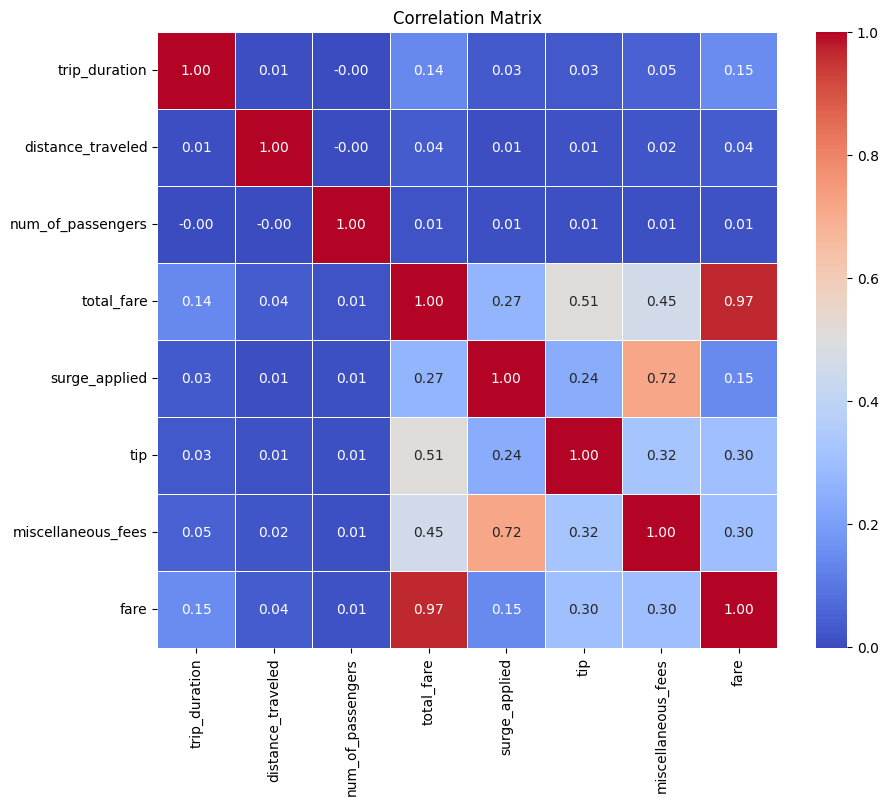

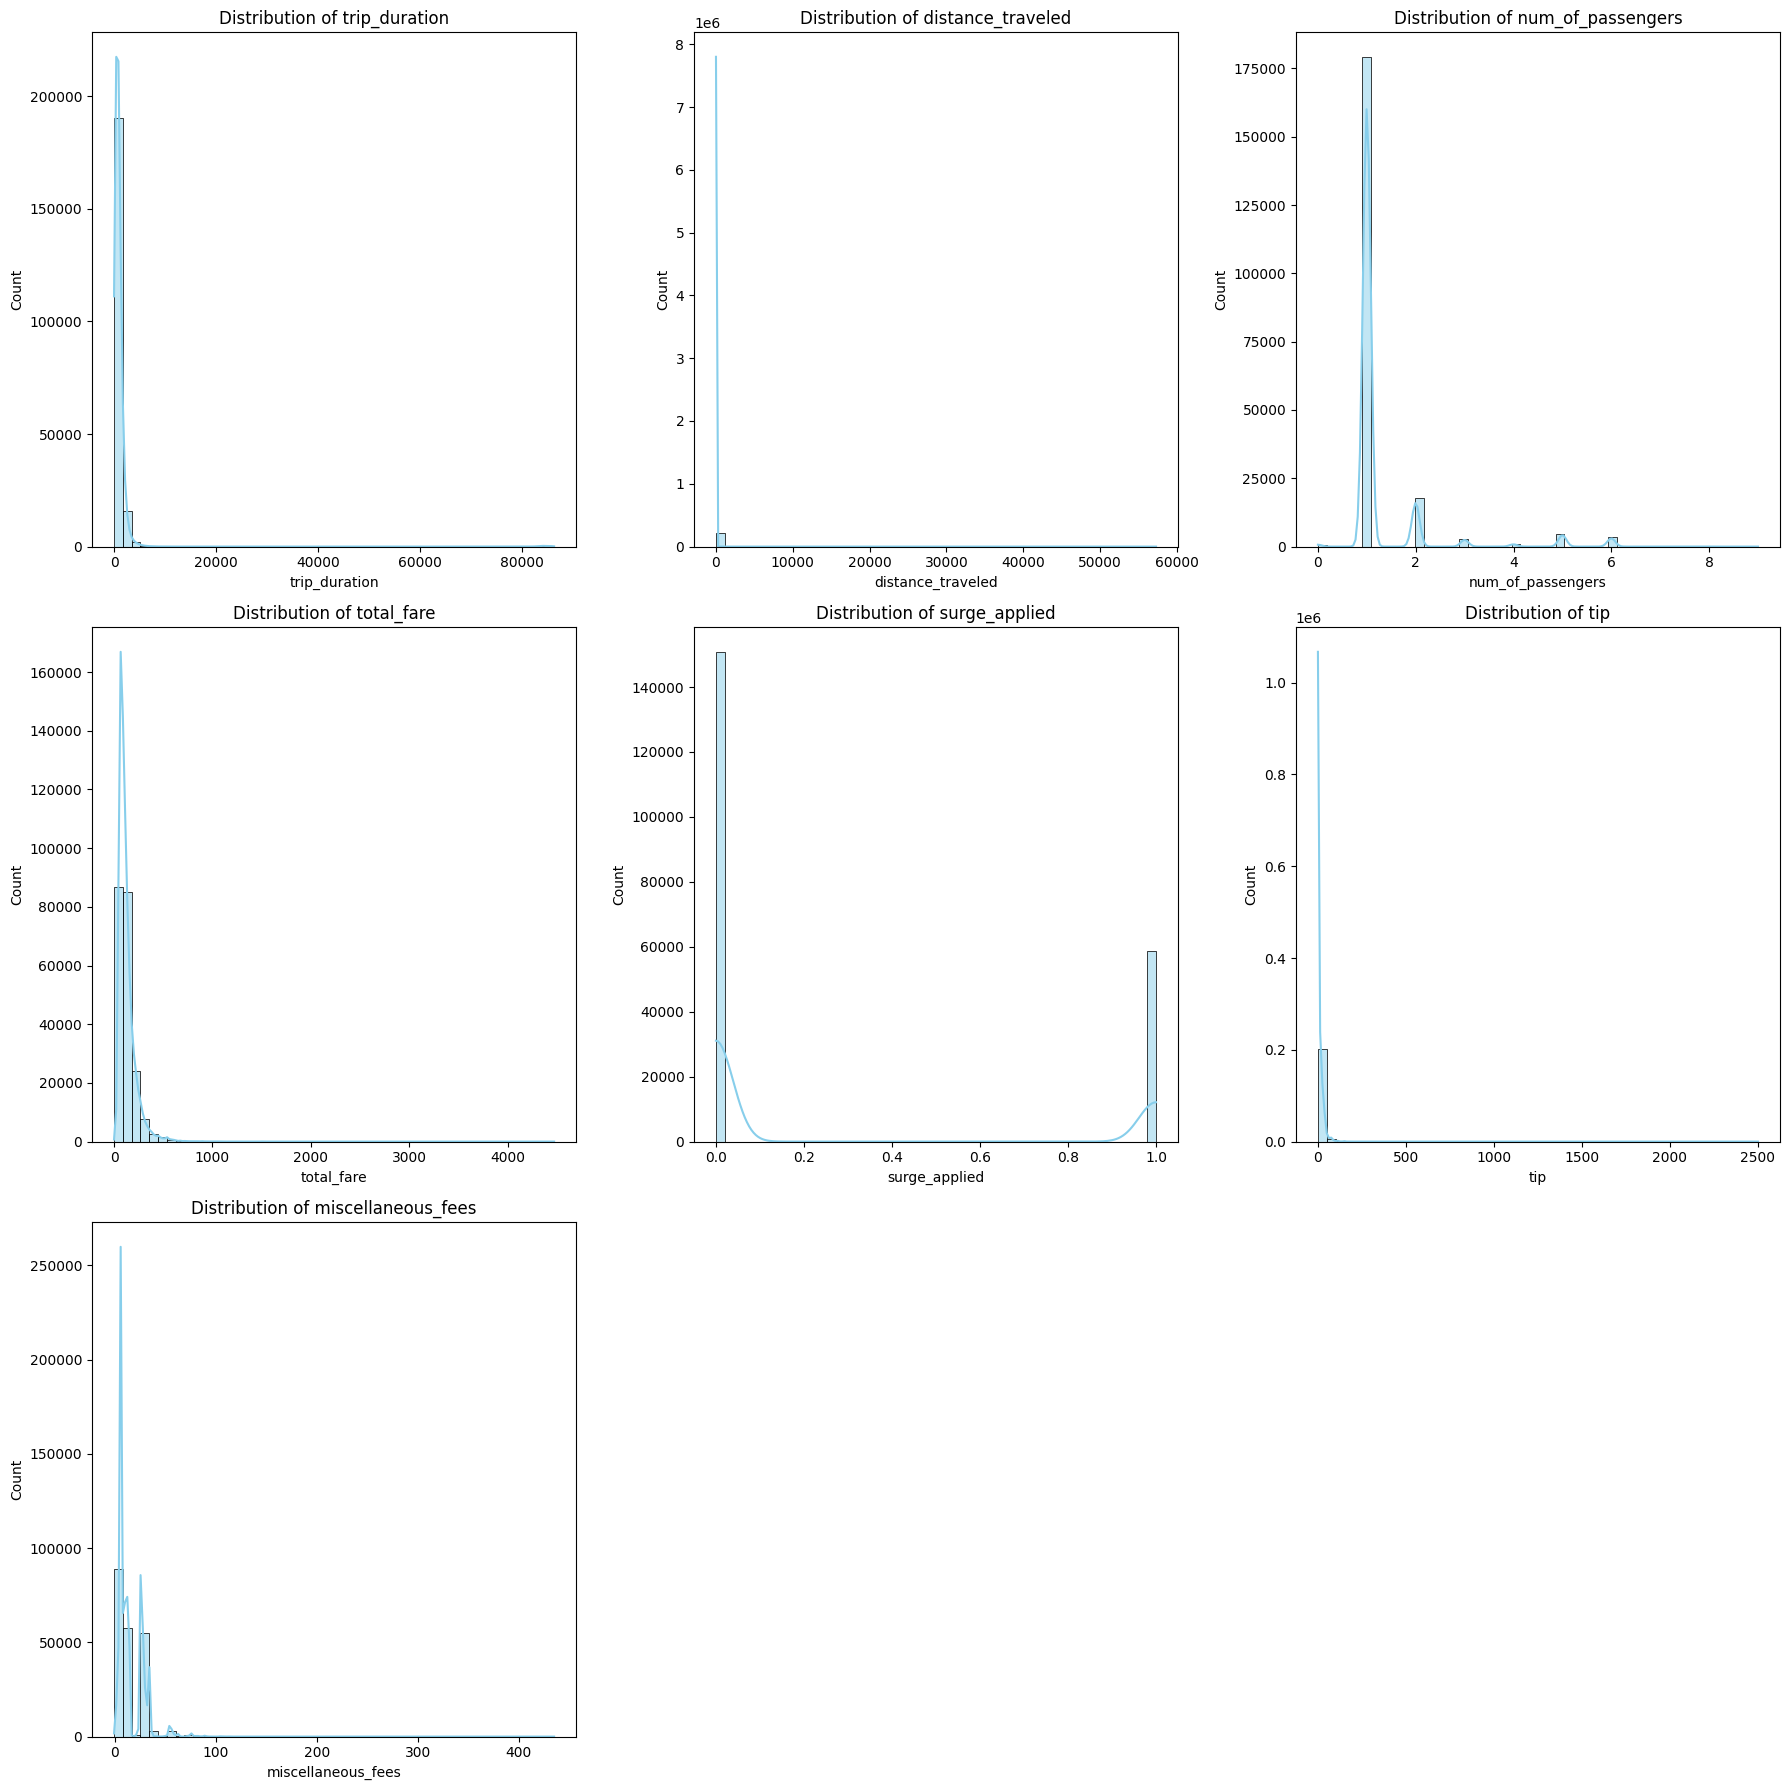

In [8]:
import warnings
warnings.filterwarnings("ignore")
distributions = ["trip_duration", "distance_traveled", "num_of_passengers",
                  "total_fare", "surge_applied", "tip", "miscellaneous_fees", "fare"]
dist = train[distributions]
correlation_matrix = dist.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Distribution plots
plt.figure(figsize=(18, 18))
for i, column in enumerate(distributions[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(dist[column], kde=True, color='skyblue', bins=50)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [11]:
print(f"Number of samples for training set:{x_train.shape}")
print(f"Number of samples for test set:{x_test.shape}")

Number of samples for training set:(167738, 7)
Number of samples for test set:(41935, 7)


In [12]:
#Normalization with minmaxscaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
print(f"let's see some of the samples after MinMax Scaling :\n{x_train_scaled}")
#u can also verify normalization in machine learning books and google
#course how normalization is going to This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

standard_scaler = StandardScaler()
x_train_standard_scaled = standard_scaler.fit_transform(x_train)
x_test_standard_scaled = standard_scaler.transform(x_test)
print(f"\nSamples after Standard scaling:\n{x_train_standard_scaled}")

let's see some of the samples after MinMax Scaling :
[[6.15833401e-03 3.59612450e-05 1.11111111e-01 ... 3.71886121e-02
  1.77092068e-02 0.00000000e+00]
 [1.33932189e-02 1.75267427e-04 1.11111111e-01 ... 9.63523132e-02
  5.25071273e-02 1.00000000e+00]
 [3.62323035e-03 3.61358141e-05 1.11111111e-01 ... 2.35765125e-02
  1.36676170e-02 0.00000000e+00]
 ...
 [9.76998854e-03 4.62608248e-05 1.11111111e-01 ... 4.80427046e-02
  2.23042093e-02 0.00000000e+00]
 [4.73450866e-03 3.08987396e-05 1.11111111e-01 ... 2.31316726e-02
  1.22421600e-02 0.00000000e+00]
 [1.11590864e-02 6.14483409e-05 6.66666667e-01 ... 9.65302491e-02
  2.60774778e-02 1.00000000e+00]]

Samples after Standard scaling:
[[-1.34008620e-01 -2.16736400e-02 -3.14450374e-01 ... -4.13910394e-01
  -4.88942217e-01 -6.24037051e-01]
 [-3.03600484e-03  3.53486677e-02 -3.14450374e-01 ...  9.14928281e-01
   1.07828983e+00  1.60246895e+00]
 [-1.79901424e-01 -2.16021835e-02 -3.14450374e-01 ... -7.19643202e-01
  -6.70967723e-01 -6.24037051e-01]

In [13]:
reg=LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [14]:
pred=reg.predict(x_test_scaled)
print(f"predictions :\n{pred[1:10].reshape(-1,1)}")

predictions :
[[ 72.32978455]
 [ 77.36551257]
 [ 72.32978455]
 [ 90.21148196]
 [ 90.34177771]
 [143.41726712]
 [108.80834317]
 [ 37.60966616]
 [241.43278926]]


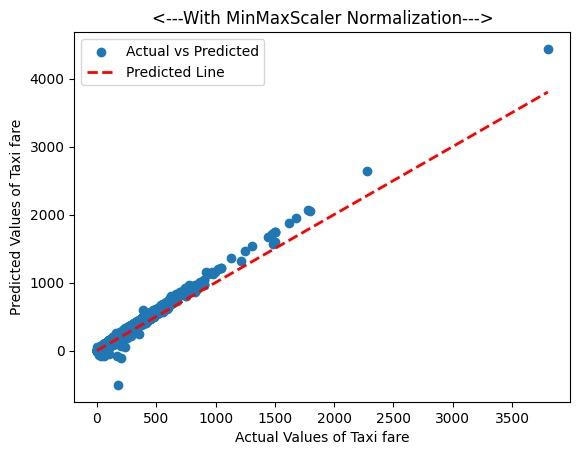

In [15]:
plt.scatter(y_test, pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values of Taxi fare")
plt.ylabel("Predicted Values of Taxi fare")
plt.title("<---With MinMaxScaler Normalization--->")
plt.legend()
plt.show()

In [17]:
mae=mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'Error medio absoluto (MAE): {mae:.2f}')
print(f'Error cuadratico medio (MSE): {mse:.2f}')
print(f'Raiz distancia media cuadratica (RMSE): {rmse:.2f}')
print(f'Coeficiente de determinacion(R2): {r2:.2f}')


Error medio absoluto (MAE): 18.06
Error cuadratico medio (MSE): 555.87
Raiz distancia media cuadratica (RMSE): 23.58
Coeficiente de determinacion(R2): 0.92


In [19]:
reg=LinearRegression()
reg.fit(x_train_standard_scaled,y_train)

LinearRegression()

In [20]:
y_pred=reg.predict(x_test_standard_scaled)
print(f"predictions :\n{pred[1:10].reshape(-1,1)}")


predictions :
[[ 72.32978455]
 [ 77.36551257]
 [ 72.32978455]
 [ 90.21148196]
 [ 90.34177771]
 [143.41726712]
 [108.80834317]
 [ 37.60966616]
 [241.43278926]]
